# Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [2]:
img = image.load_img("image1.jpeg")

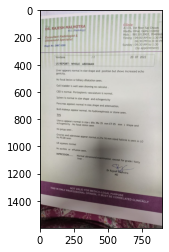

In [3]:
plt.imshow(img)

# Data

In [6]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset = train.flow_from_directory('C:\\Users\\graje\\OneDrive\\Desktop\\cv\\basedata\\training',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')


validation_dataset = validation.flow_from_directory('C:\\Users\\graje\\OneDrive\\Desktop\\cv\\basedata\\validation',
                                                   target_size = (200,200),
                                                   batch_size = 3,
                                                   class_mode = 'binary')

Found 11 images belonging to 1 classes.
Found 11 images belonging to 1 classes.


In [8]:
train_dataset.class_indices

{'Presciption': 0}

# Model Building

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape=(200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   ##
                                   tf.keras.layers.Dense(1,activation='sigmoid')
                                   ])

In [10]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics = ['accuracy'])

C:\Users\graje\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch =3,
                     epochs = 10,
                     validation_data = validation_dataset)

Epoch 1/10
3/3 [==============================] - 3s 800ms/step - loss: 0.2500 - accuracy: 1.0000 - val_loss: 1.2058e-19 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 2s 606ms/step - loss: 1.4737e-19 - accuracy: 1.0000 - val_loss: 1.2058e-19 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 2s 733ms/step - loss: 1.4694e-19 - accuracy: 1.0000 - val_loss: 1.2058e-19 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 2s 635ms/step - loss: 1.6580e-19 - accuracy: 1.0000 - val_loss: 1.2058e-19 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 2s 711ms/step - loss: 1.6580e-19 - accuracy: 1.0000 - val_loss: 1.2058e-19 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 2s 608ms/step - loss: 1.6580e-19 - accuracy: 1.0000 - val_loss: 1.2058e-19 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 2s 625ms/step - loss: 1.6531e-19 - accuracy: 1.0000 - val_loss: 1.

In [12]:
train_dataset.class_indices

{'Presciption': 0}

# Prediction

In [13]:
y_pred = model.predict(train_dataset)


4/4 [==============================] - 0s 91ms/step


In [14]:
y_pred[:5]

array([[1.0191575e-26],
       [2.8404439e-23],
       [2.2895375e-23],
       [1.0398233e-23],
       [1.3522946e-24]], dtype=float32)

In [15]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 0, 0, 0]